# Association Rule Mining 
Main goal is to find out which products are bought frequently togethor

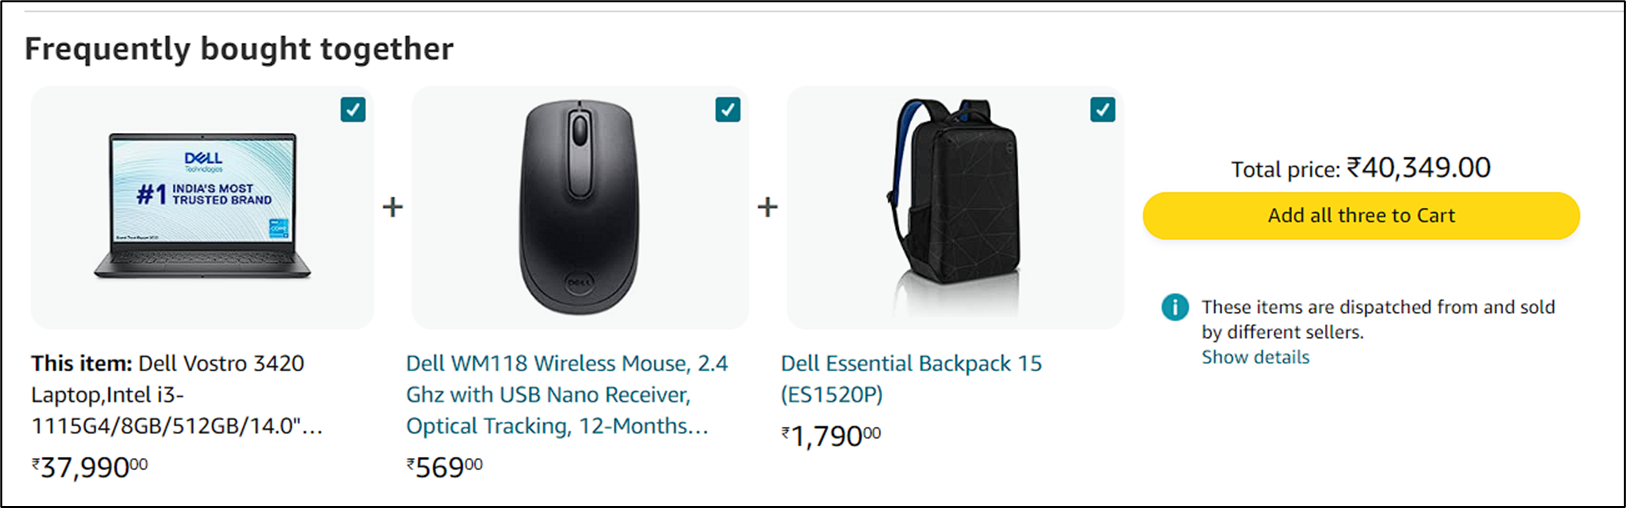

### Install apyori package

In [1]:
%pip install apyori

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart Kernel and run all cells

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the csv file with apyori package load_transactions

In [3]:
from apyori import load_transactions
with open("store_data.csv", "r") as file1:
    transactions = list(load_transactions(file1, delimiter=","))

In [7]:
transactions[0:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

In [8]:
len(transactions)

7501

Above is a weekly data

### Step 2: Calculate Minimum support
Get results only for the items which are purchased atleast 5 times a day
Weekly purchase = 7x5 = 35

In [9]:
sup = (7*5)/len(transactions)
sup

0.004666044527396347

### Minimum Confidence = 0.2, Minimum Lift = 3

### Step 3: Apply apriori algorithm

In [12]:
from apyori import apriori
association_rules = apriori(
    transactions, 
    min_support = sup,
    min_confidence = 0.2,
    min_lift = 3
)
results = list(association_rules)
results

[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'tomato sauce', 'ground beef'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'groun

In [13]:
results[0]

RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])

In [14]:
results[0][0]

frozenset({'escalope', 'mushroom cream sauce'})

In [16]:
for i in results:
    print(list(i[0]))

['escalope', 'mushroom cream sauce']
['escalope', 'pasta']
['herb & pepper', 'ground beef']
['tomato sauce', 'ground beef']
['olive oil', 'whole wheat pasta']
['shrimp', 'pasta']
['frozen vegetables', 'shrimp', 'chocolate']
['spaghetti', 'ground beef', 'cooking oil']
['frozen vegetables', 'ground beef', 'spaghetti']
['olive oil', 'frozen vegetables', 'milk']
['mineral water', 'frozen vegetables', 'shrimp']
['olive oil', 'frozen vegetables', 'spaghetti']
['frozen vegetables', 'shrimp', 'spaghetti']
['frozen vegetables', 'spaghetti', 'tomatoes']
['grated cheese', 'ground beef', 'spaghetti']
['mineral water', 'herb & pepper', 'ground beef']
['herb & pepper', 'ground beef', 'spaghetti']
['olive oil', 'ground beef', 'milk']
['spaghetti', 'ground beef', 'shrimp']
['olive oil', 'spaghetti', 'milk']
['mineral water', 'olive oil', 'soup']
['olive oil', 'spaghetti', 'pancakes']


In [17]:
len(results)

22

In [18]:
type(results[0])

apyori.RelationRecord

### Step 4: Save association Results in text file

In [19]:
with open("AssociationResults.txt", "w") as file2:
    for i in results:
        file2.writelines(str(i)+'\n\n\n')